# Домашнее задание по теме «Основные библиотеки: MatplotLib / Seaborn / Plotly»

## Импорт модулей

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

## Задача 1

Сформируем массивы данных.

In [2]:
x = np.arange(0, 4.01, 0.01)
y = np.cos(20 * x) / (x + 0.1)

Построим график с помощью matplotlib.

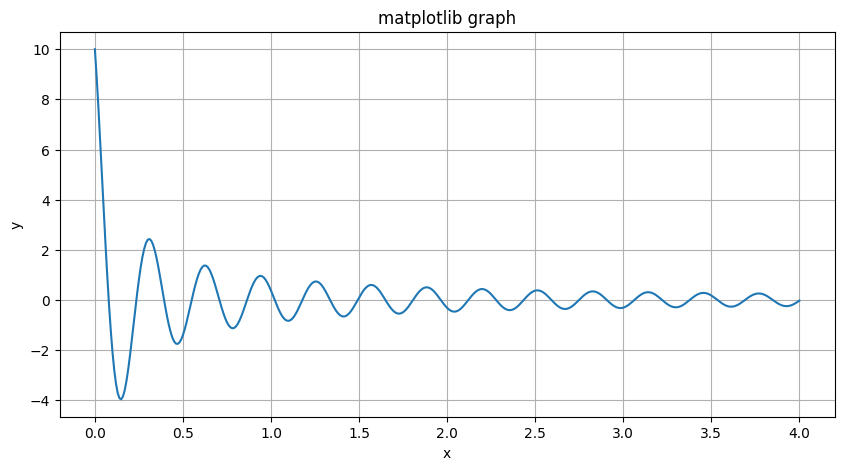

In [3]:
def show_with_matplotlib(x, y, title, figsize=(10, 5)):
    fig, ax = plt.subplots(figsize=figsize)

    ax.plot(x, y)
    ax.set(xlabel="x", ylabel="y", title=title)
    ax.grid(True)

    plt.show()


show_with_matplotlib(x, y, "matplotlib graph")

Построим график с помощью seaborn.

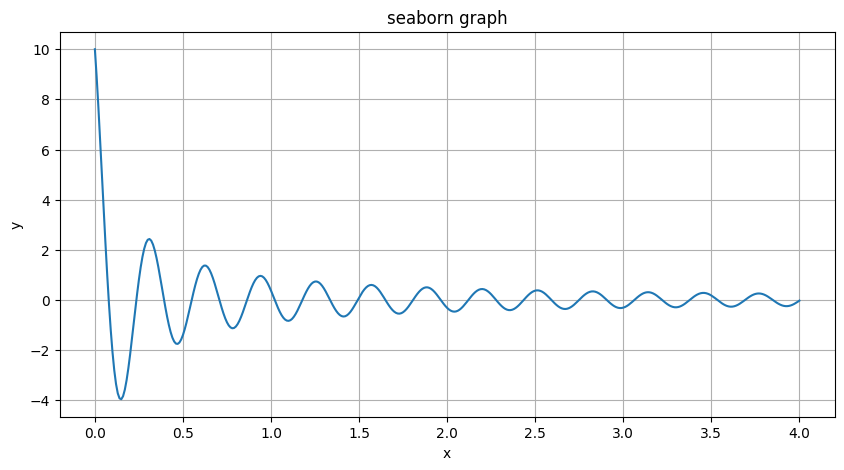

In [4]:
def show_with_seaborn(x, y, title, figsize=(10, 5)):
    fig, ax = plt.subplots(figsize=figsize)

    sns.lineplot(data={"x": x, "y": y}, x="x", y="y")
    ax.set_title(title)
    ax.grid(True)

    plt.show()


show_with_seaborn(x, y, "seaborn graph")

Построим график с помощью plotly.

In [5]:
def show_with_plotly(x, y, title, figsize=(900, 450)):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode="lines"))

    fig.update_layout(
        title=title,
        xaxis_title="x",
        yaxis_title="y",
        width=figsize[0],
        height=figsize[1],
    )

    fig.show()


show_with_plotly(x, y, "plotly_graph")